#**THE SPARKS FOUNDATION**

##TASK 2: Color Identification in Images

##**Author: Heemali Chaudhari**

GRIP JULY 21 (COMPUTER VISION & IoT)

####IMPORTING THE REQUIRED LIBRARIES:

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

####IMPORTING THE IMAGE:

In [3]:
from google.colab import files 

In [21]:
uploaded = files.upload()

Saving Sunset.jpg to Sunset.jpg


####LET'S FIRST READ A SAMPLE IMAGE & UNDERSTAND BASIC OPERATIONS THAT WE CAN DO ON IT.

The type of this input is <class 'numpy.ndarray'>
Shape: (183, 275, 3)


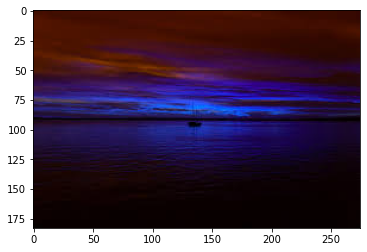

In [23]:
imgName = 'Sunset.jpg'
image = cv2.imread(imgName)
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)


#### WE SEE THAT THE IMAGE HAS DIFFERENT COLORS AS COMPARED TO THE ORIGINAL IMAGE. THIS IS BECAUSE BY DEFAULT OPENCV READS THE IMAGES IN THE COLOR ORDER **BLUE GREEN RED** I.E. **BGR**. THUS, WE NEED TO CONVERT IT INTO **REG GREEN BLUE** I.E. **RGB**.

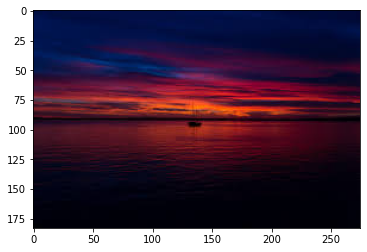

In [24]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

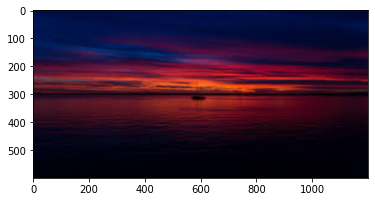

In [25]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

## COLOR IDENTIFICATION

#### FIRST, WE WILL DEFINE A FUNCTION THAT CAN GIVE US THE HEX VALUES OF OUR THE COLORS THAT WE WILL IDENTIFY.

In [26]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

#### KMEANS EXPECTS FLATTENED ARRAY AS INPUT DURING ITS FIT METHOD. THUS, WE NEED TO RESHAPE THE IMAGE USING NUMPY. 

#### NOW, THE CLUSTER OF COLORS ARE IDENTIFIED AND ARRANGED IN THE CORRECT ORDER. 

#### WE PLOT THE COLORS AS A PIE CHART.

In [18]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [19]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([91.74321081, 18.3757707 , 39.03722879]),
 array([ 4.52349231,  9.76307257, 50.69038496]),
 array([33.12977503,  7.93299703, 25.57731581]),
 array([ 3.16891983,  1.65886632, 12.81729293]),
 array([169.34742181,  40.8758604 ,  43.05784326]),
 array([ 3.68137309, 17.02530088, 71.75164114]),
 array([228.65205772,  74.76643506,  29.5464992 ]),
 array([63.78137634, 10.82225317, 30.07187135]),
 array([105.92803714,  40.75625484,  74.47098272]),
 array([49.97538797, 15.7646096 , 60.61875606]),
 array([10.80221774, 34.68004032, 95.9233871 ]),
 array([127.92302726,  25.7294835 ,  40.2748924 ])]

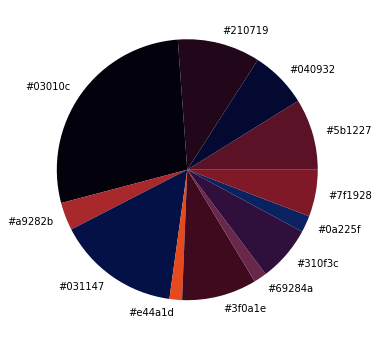

In [30]:
get_colors(get_image(imgName), 12, True)